### 相关库的导入

In [44]:
import numpy as np  # numpy库用于数值计算
import matplotlib.pyplot as plt  # pyplot库用于绘图
import pandas as pd  # pandas库用于数据处理
import os  # os库用于处理文件路径

### csv文件读取函数

In [47]:
def load_data_pandas(file_path):
    """ 使用pandas从csv文件中读取数据, 第一列是X, 第二列是Y """
    data = pd.read_csv(file_path)
    X = data.iloc[:, 0].values
    Y = data.iloc[:, 1].values
    return X, Y

### 代价函数 J(θ)

In [50]:
def costFunctionJ(x, y, theta):
    """ 计算代价函数J(θ) """
    m = len(y)  # 样本数量
    predictions = x @ theta  # 预测值
    sqrErrors = np.square(predictions - y)  # 残差平方
    j = 1 / (2 * m) * np.sum(sqrErrors)  # 代价函数
    return j

### 实现梯度下降算法的函数

In [53]:
def gradientDescent(x, y, theta, alpha, num_iters):
    """ 执行梯度下降，优化参数 """
    m = len(y)  # 样本数量
    n = len(theta)  # 参数个数
    temp = np.mat(np.zeros([n, num_iters]))  # 存储theta更新历史
    j_history = np.mat(np.zeros([num_iters, 1]))  # 存储代价函数历史

    for i in range(num_iters):
        h = x * theta  # 预测值
        error = h - y  # 误差
        gradient = (x.T * error) / m  # 梯度
        theta = theta - alpha * gradient  # 更新theta
        temp[:, i] = theta  # 记录更新后的theta
        j_history[i] = costFunctionJ(x, y, theta)  # 记录代价函数值

        # 打印迭代信息（每10000次迭代打印一次）
        if (i+1) % 10000 == 0:
            print(f"迭代次数 {i+1}: 代价函数值 = {j_history[i, 0]:.4f}")

    return theta, j_history, temp

## 主函数

初始代价函数值: 45.5000
迭代次数 10000: 代价函数值 = 0.6967
迭代次数 20000: 代价函数值 = 0.6967
迭代次数 30000: 代价函数值 = 0.6967
迭代次数 40000: 代价函数值 = 0.6967
迭代次数 50000: 代价函数值 = 0.6967
迭代次数 60000: 代价函数值 = 0.6967
迭代次数 70000: 代价函数值 = 0.6967
迭代次数 80000: 代价函数值 = 0.6967
迭代次数 90000: 代价函数值 = 0.6967
迭代次数 100000: 代价函数值 = 0.6967
最终代价函数值： 0.6967063492063497
最终theta值：
 [[0.01904762]
 [2.03928571]]


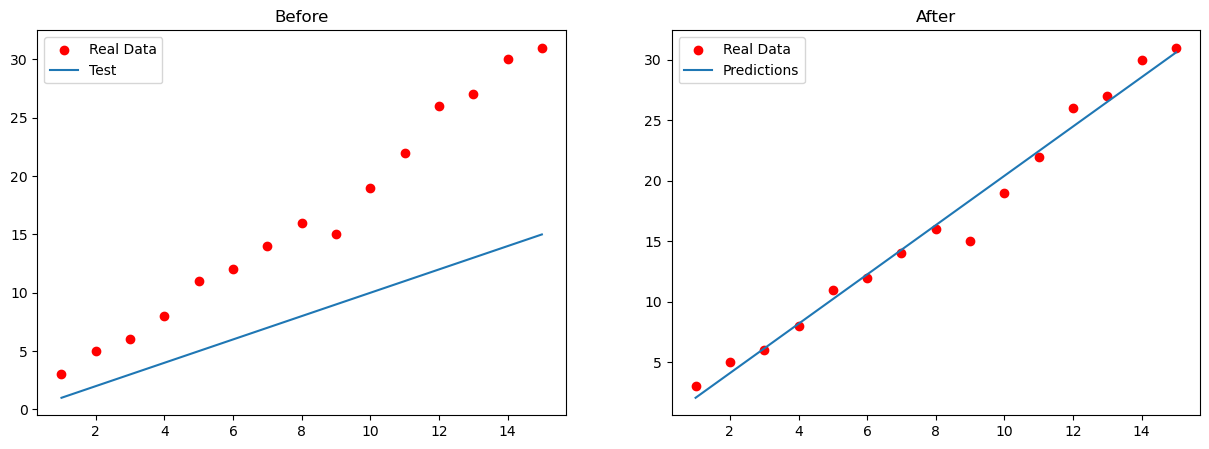

In [62]:
def main():
    """ 1 加载数据 """
    file_path = r'C:\Users\Lamarck\Desktop\Linear Regression.csv'
    X, Y = load_data_pandas(file_path)

    """ 2 准备数据矩阵 """
    m = len(Y)  # 样本数量
    X_b = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))  # 添加偏置项
    x = np.mat(X_b)  # 转换为矩阵
    y = np.mat(Y).reshape(m, 1)  # 转换为列向量

    """ 3 初始化参数theta """
    theta = np.mat([0, 1]).reshape(2, 1)

    """ 4 计算初始代价函数值 """
    initial_cost = costFunctionJ(x, y, theta)
    print(f"初始代价函数值: {initial_cost:.4f}")

    """ 5 绘制训练前的图像 """
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, c='r', label='Real Data')
    plt.plot(X, x * theta, label='Test')
    plt.legend(loc='best')
    plt.title('Before')

    """ 6 设置梯度下降参数并执行 """
    alpha = 0.01  # 学习率
    num_iters = 100000  # 迭代次数
    theta, j_history, temp = gradientDescent(x, y, theta, alpha, num_iters)

    """ 7 打印结果 """
    print('最终代价函数值：', j_history[-1, 0])
    print('最终theta值：\n', theta)

    """ 8 绘制训练后的图像 """
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, c='r', label='Real Data')
    plt.plot(X, x * theta, label='Predictions')
    plt.legend(loc='best')
    plt.title('After')
    plt.show()

if __name__ == "__main__":
    main()